There are two classes and the goal is to distinguish between <br>spill and non-spill using the features for a given ocean patch.<br>
• Non-Spill: negative case, or majority class.<br>
• Oil Spill: positive case, or minority class.<br>
There are a total of 50 Columns in the Dataset , the output column is named as target.

<B>Q.1. Download the Oil Spill Dataset and perform Data cleaning and Data Pre-Processing if Necessary<b>


In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [2]:
# Loading the dataset
oil_df=pd.read_csv('oil_spill.csv')
oil_df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [3]:
# Perform data cleaning and preprocessing
# Example: Remove missing values
nv= oil_df.isnull().sum()
nv= nv[nv>0]
nv

Series([], dtype: int64)

In [4]:
oil_df.dropna(inplace=True)

In [5]:
oil_df.duplicated().sum()

0

In [6]:
oil_df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


EDA

In [7]:
oil_df.columns

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'target'],
      dtype='object')

In [8]:
df=oil_df

In [9]:
#Separatiing the categorical and continuous columns
def Cat_Cont(df):
    cat_cols,cont_cols=[],[]
    for col in df.columns[:-1]:#we are exluding the target variable
        count=df[col].nunique()
        if count < 10:
            cat_cols.append(col)
        else:
            cont_cols.append(col)
    return (cat_cols,cont_cols)

In [10]:
cat_col, cont_col = Cat_Cont(df)
print(f"Categorical Columns length is {len(cat_col)} \n :{cat_col}")
print(f"Continuous Columns length is {len(cont_col)} \n {cont_col}")

Categorical Columns length is 10 
 :['f_22', 'f_23', 'f_25', 'f_26', 'f_27', 'f_33', 'f_37', 'f_39', 'f_40', 'f_46']
Continuous Columns length is 39 
 ['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_24', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_34', 'f_35', 'f_36', 'f_38', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_47', 'f_48', 'f_49']


In [11]:
x=['f_1','f_23','f_33','f_37']
for i in x:
    print(f"{i} columns with unique values : \n {df[i].value_counts()}")
    print("********************************* \n")

f_1 columns with unique values : 
 3      9
5      9
6      9
8      9
9      9
      ..
261    1
266    1
267    1
269    1
204    1
Name: f_1, Length: 238, dtype: int64
********************************* 

f_23 columns with unique values : 
 0    937
Name: f_23, dtype: int64
********************************* 

f_33 columns with unique values : 
 0.00    933
0.87      2
0.01      1
0.86      1
Name: f_33, dtype: int64
********************************* 

f_37 columns with unique values : 
 0.01    580
0.00    324
0.02     33
Name: f_37, dtype: int64
********************************* 



In [12]:
df.drop(['f_1','f_23','f_33','f_37'],axis=1,inplace=True)
df.shape

(937, 46)

In [13]:
#separting categorical and continuos once again
cat_col, cont_col = Cat_Cont(df)

In [14]:

cat_col, cont_col = Cat_Cont(df)
print(f"Categorical Columns length is {len(cat_col)} \n :{cat_col}")
print(f"Continuous Columns length is {len(cont_col)} \n {cont_col}")

Categorical Columns length is 7 
 :['f_22', 'f_25', 'f_26', 'f_27', 'f_39', 'f_40', 'f_46']
Continuous Columns length is 38 
 ['f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_24', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_34', 'f_35', 'f_36', 'f_38', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_47', 'f_48', 'f_49']


0    896
1     41
Name: target, dtype: int64


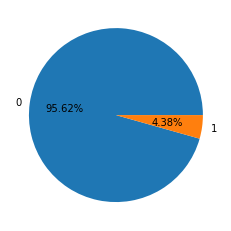

In [15]:
r=df['target'].value_counts()
print(r)
plt.pie(r,labels=r.index,autopct='%.2f%%')
plt.show()

KeyError: 'target'

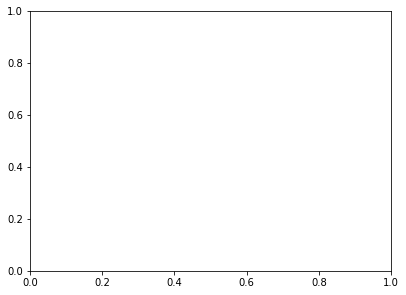

In [28]:
plt.figure(figsize=(22, 22))
for i in range(len(cat_col)):
    plt.subplot(4, 3, i + 1) #i+1 nahi samajh
    ct = pd.crosstab(index=df[cat_col[i]], columns=df['target'])
    ct.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Stacked Bar Chart for {cat_col[i]}')
    plt.xlabel(cat_col[i])
    plt.ylabel('Count')
    plt.legend(title='target', labels=['0', '1'])
plt.tight_layout()
plt.show()

In [17]:
df2=df.copy()
df_cat=df2[cat_col]
df_cat['out_put']=df2.iloc[:,-1]

C:\Users\USER\AppData\Local\Temp/ipykernel_5400/1590522172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['out_put']=df2.iloc[:,-1]


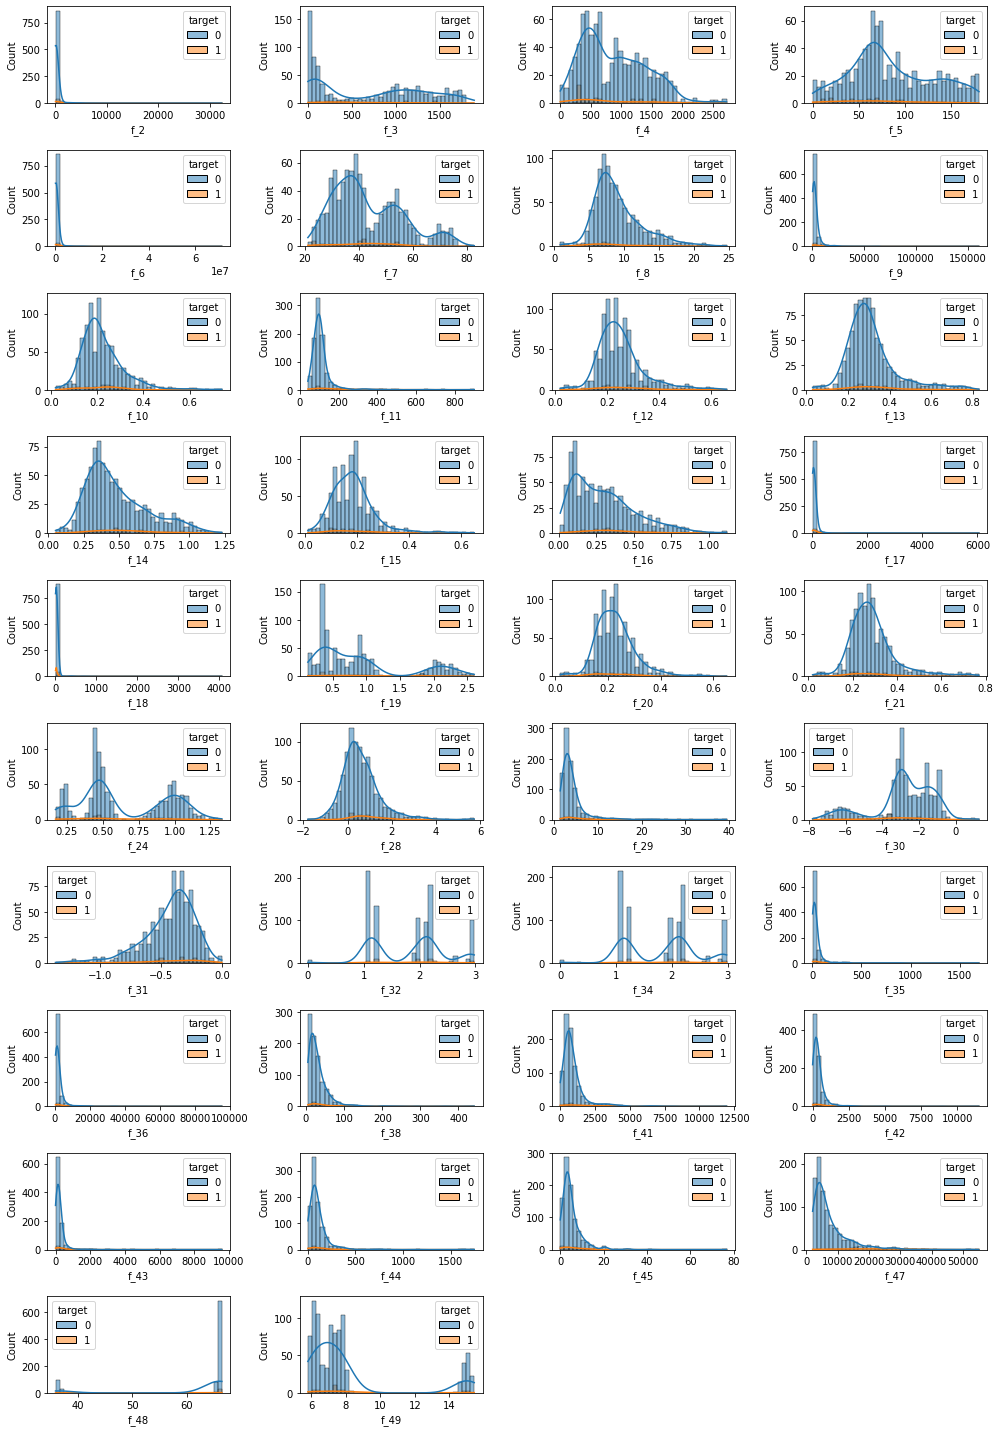

In [18]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(14,20))
for i,col in enumerate(cont_col):
    plt.subplot(10,4,i+1)
    sns.histplot(df,x=cont_col[i],bins=40,kde=True,hue="target")
plt.tight_layout()
plt.show()

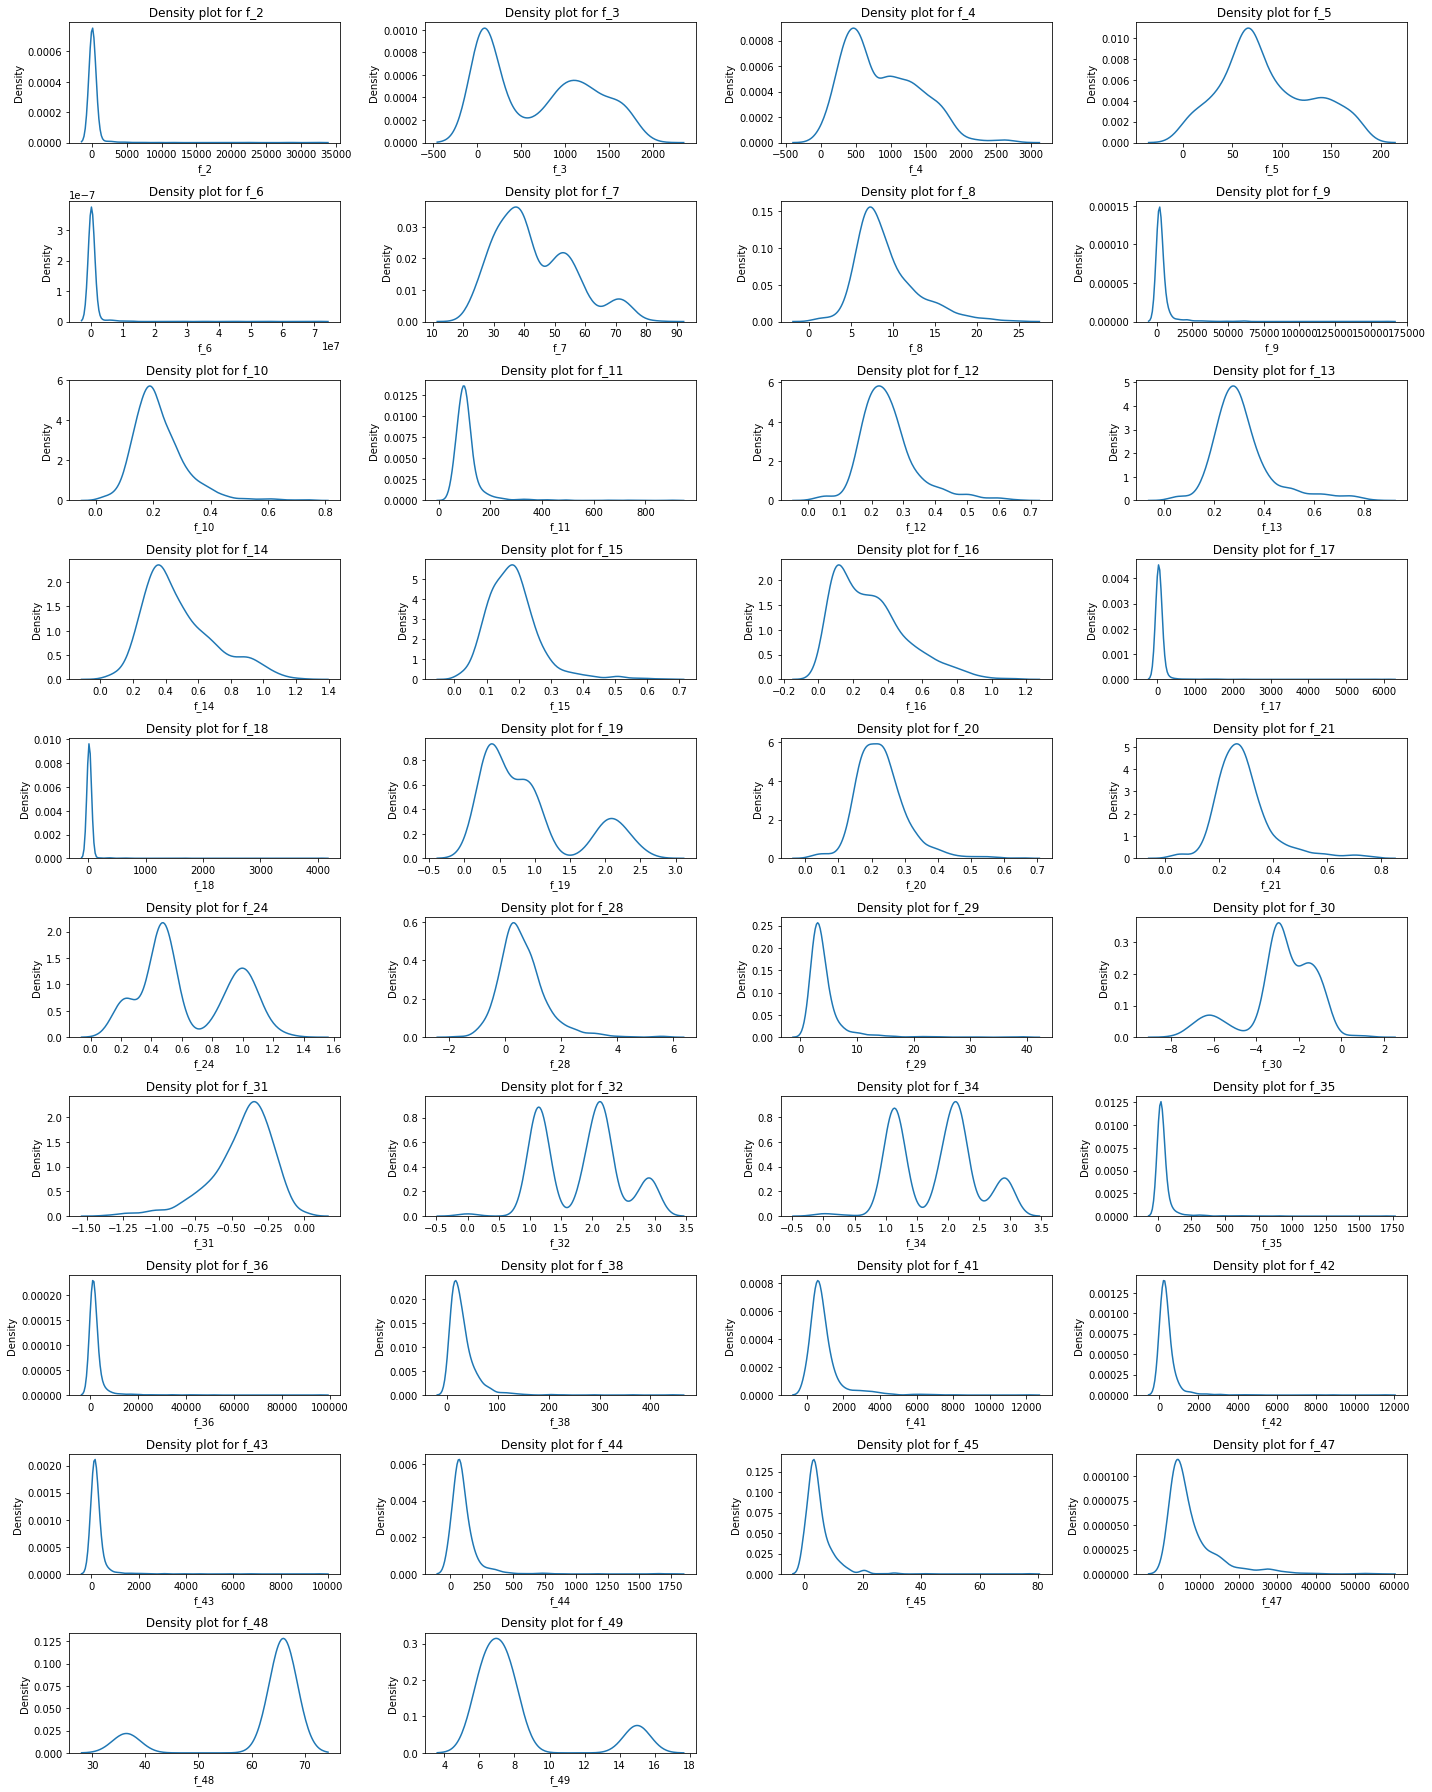

In [19]:
plt.figure(figsize=(20,25))
for i,col in enumerate(cont_col):
    plt.subplot(10,4,i+1)
    sns.kdeplot(df[col])
    plt.title(f' Density plot for {col}')
plt.tight_layout()
plt.savefig('KDE plot for Continuos Columns')
plt.show()

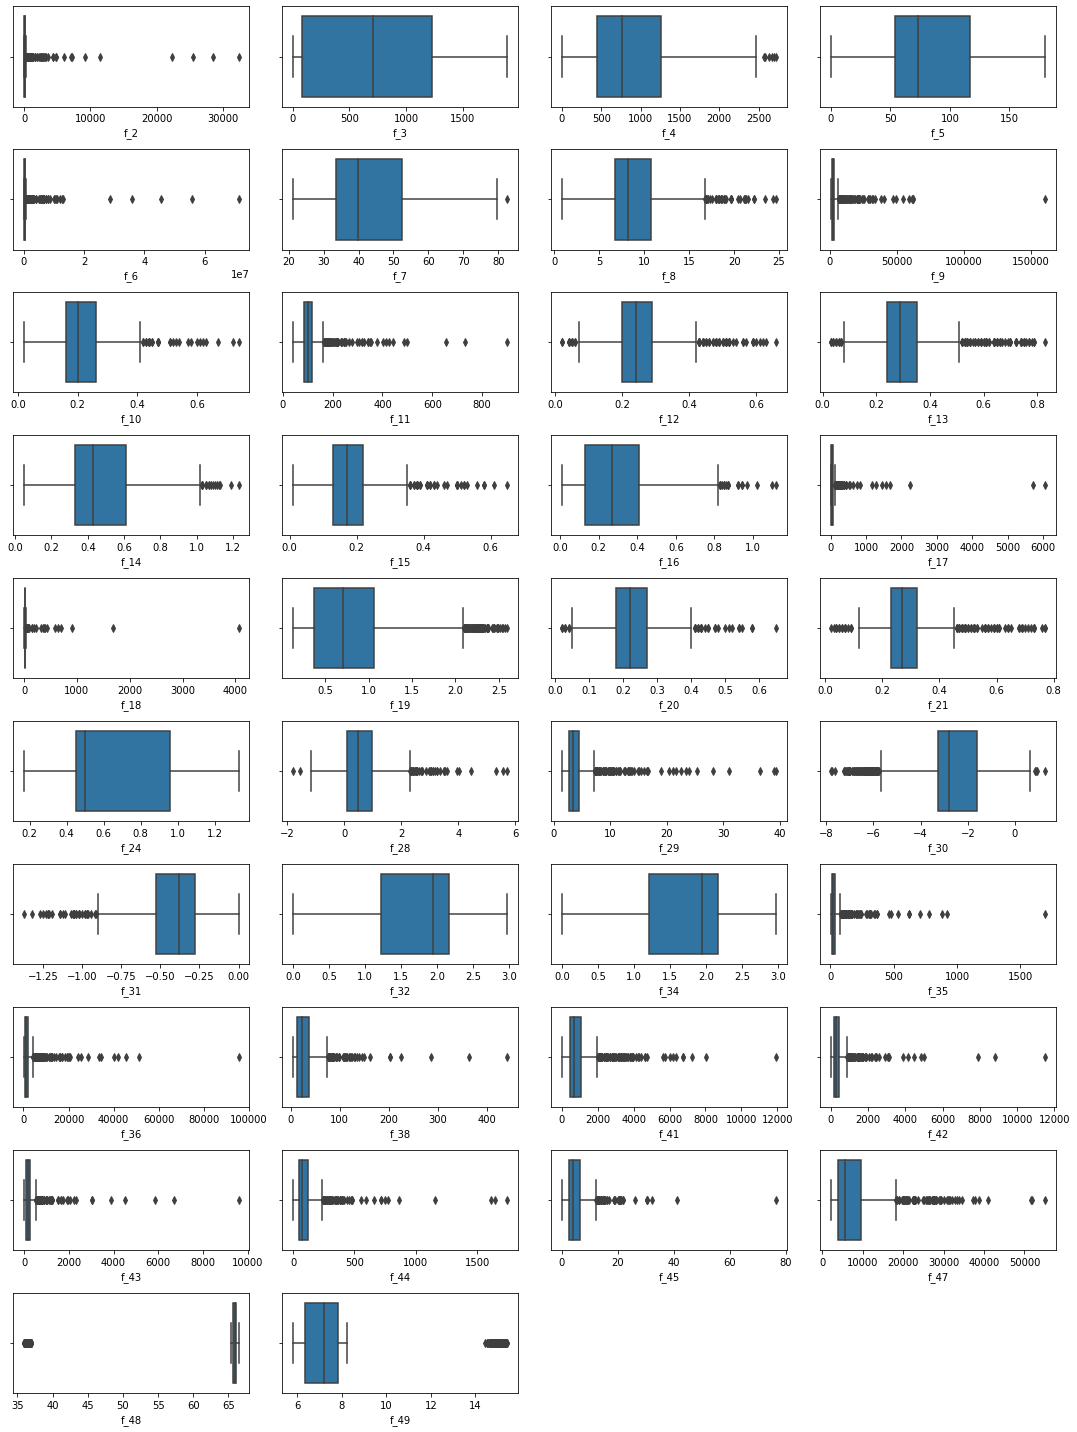

In [20]:
plt.figure(figsize=(15,20))
for i in range(len(cont_col)):
    plt.subplot(10,4,i+1)
    sns.boxplot(df,x=cont_col[i])
plt.tight_layout()
plt.show()

In [21]:
df[cont_col].describe()

,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,...,f_36,f_38,f_41,f_42,f_43,f_44,f_45,f_47,f_48,f_49
count,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,109.892743,...,2432.689434,31.241857,933.928677,427.565582,255.435902,106.112519,5.014002,7985.718004,61.694386,8.119723
std,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,61.460846,...,5219.377585,31.584838,1001.681331,715.391648,534.306194,135.617708,5.029151,6854.504915,10.412807,2.908895
min,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,41.000000,...,360.000000,5.050000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000
25%,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,83.500000,...,720.000000,13.450000,450.000000,180.000000,90.800000,50.120000,2.370000,3760.570000,65.720000,6.340000
50%,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,99.800000,...,1350.000000,23.630000,685.420000,270.000000,161.650000,73.850000,3.850000,5509.430000,65.930000,7.220000
75%,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,115.400000,...,2160.000000,37.760000,1053.420000,460.980000,265.510000,125.810000,6.320000,9521.930000,66.130000,7.840000
max,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,901.700000,...,95310.000000,441.230000,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,55128.460000,66.450000,15.440000


In [22]:
for i in df[cont_col]:
    q1=df[cont_col].quantile(0.25)
    q3=df[cont_col].quantile(0.75)
    iqr=q3-q1
    bmin=q1-1.5*iqr
    bmax=q3+1.5*iqr
    df[cont_col]=np.where(df[cont_col]>bmax,bmax,df[cont_col])
    df[cont_col]=np.where(df[cont_col]<bmin,bmin,df[cont_col])

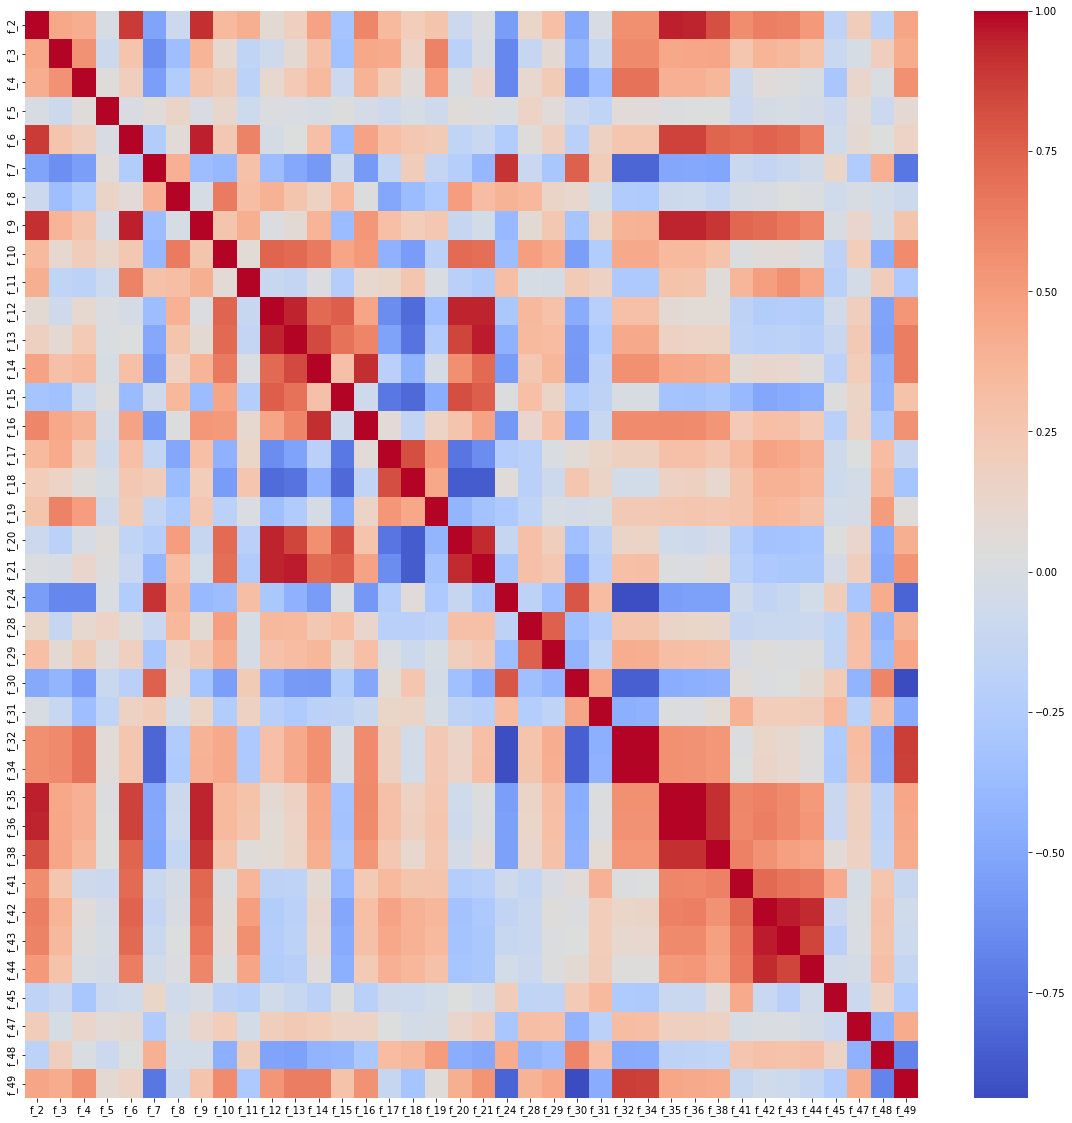

In [23]:
plt.figure(figsize=(20,20))
corr=df[cont_col].corr()

sns.heatmap(corr,cmap='coolwarm')
plt.show()

<b>Q2)Use various methods such as Handling null values, One-Hot Encoding, Imputation, and Scaling of Data Pre-Processing where necessary.<b>

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## Handling null values

# Option 1: Drop rows with missing values
oil_df.dropna(inplace=True)

# Option 2: Impute missing values
imputer = SimpleImputer(strategy='mean') # You can choose different imputation strategies (mean, median, most_frequent, etc.)
imputed_df = imputer.fit_transform(oil_df)

# One-Hot Encoding categorical data
encoder = OneHotEncoder(sparse_output=False, drop='first') # Drop first column to avoid multicollinearity
encoded_df = pd.DataFrame(encoder.fit_transform(oil_df[['target']]))
df = pd.concat([oil_df, encoded_df], axis=1)
df.drop(['target'], axis=1, inplace=True)

# Scaling of numerical features
scaler = StandardScaler()
scaler_df = scaler.fit_transform(encoded_df)

# or

In [25]:
# Perform feature scaling
scaler = StandardScaler()
oil_df[['f_1', 'f_2']] = scaler.fit_transform(oil_df[['f_1', 'f_2']])
oil_df[['f_1', 'f_2']]

KeyError: "['f_1'] not in index"

In [ ]:
oil_df.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
count,9.370000e+02,9.370000e+02,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,-1.516633e-17,3.033267e-17,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,1.000534e+00,1.000534e+00,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,-1.240922e+00,-1.671971e-01,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,-7.789722e-01,-1.620182e-01,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,-2.708268e-01,-1.387130e-01,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,6.530738e-01,-1.040143e-01,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,4.163896e+00,1.660160e+01,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


# **Q.3. Derive some insights from the dataset.**

In [ ]:
import pandas as pd
# Read the dataset
df = pd.read_csv('oil_spill.csv')
average_values = df.mean(axis=0)
print(average_values)
correlation_coefficients = df.corr()
# Print the correlation coefficients
print(correlation_coefficients)

f_1           81.588047
f_2          332.842049
f_3          698.707086
f_4          870.992209
f_5           84.121665
f_6       769696.378869
f_7           43.242721
f_8            9.127887
f_9         3940.712914
f_10           0.221003
f_11         109.892743
f_12           0.251441
f_13           0.311217
f_14           0.484664
f_15           0.182892
f_16           0.301932
f_17          77.412561
f_18          31.151921
f_19           0.909039
f_20           0.228815
f_21           0.289317
f_22          76.085624
f_23           0.000000
f_24           0.642177
f_25         559.910694
f_26           0.578292
f_27           7.498196
f_28           0.608399
f_29           4.271110
f_30          -2.828420
f_31          -0.428869
f_32           1.824589
f_33           0.002785
f_34           1.821793
f_35          43.086446
f_36        2432.689434
f_37           0.006894
f_38          31.241857
f_39          91.189968
f_40          60.547492
f_41         933.928677
f_42         427

Number of rows: 937
Number of columns: 50
Summary statistics of numeric columns:
              f_1           f_2          f_3          f_4         f_5  \
count  937.000000    937.000000   937.000000   937.000000  937.000000   
mean    81.588047    332.842049   698.707086   870.992209   84.121665   
std     64.976730   1931.938570   599.965577   522.799325   45.361771   
min      1.000000     10.000000     1.920000     1.000000    0.000000   
25%     31.000000     20.000000    85.270000   444.200000   54.000000   
50%     64.000000     65.000000   704.370000   761.280000   73.000000   
75%    124.000000    132.000000  1223.480000  1260.370000  117.000000   
max    352.000000  32389.000000  1893.080000  2724.570000  180.000000   

                f_6         f_7         f_8            f_9        f_10  ...  \
count  9.370000e+02  937.000000  937.000000     937.000000  937.000000  ...   
mean   7.696964e+05   43.242721    9.127887    3940.712914    0.221003  ...   
std    3.831151e+06   12

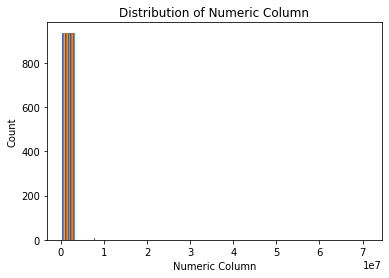

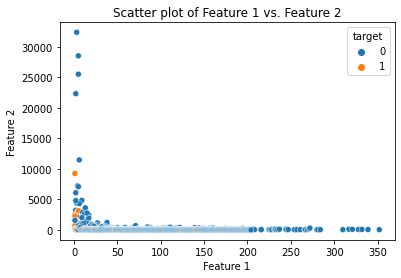

Mean of numeric column by category:
target
0    84.095982
1    26.780488
Name: f_1, dtype: float64
Outliers in f_1
     f_1  f_2      f_3      f_4  f_5     f_6    f_7    f_8     f_9  f_10  ...  \
283  266   51   508.53   162.41   62  127500  37.33   1.21  1770.0  0.03  ...   
284  267   61  1352.54   204.51   24  152500  28.36   7.27  1930.0  0.26  ...   
285  269   64   475.50   266.16   32  160000  38.28   1.23  1940.0  0.03  ...   
286  271  191  1263.12   945.90   57  477500  29.79   7.58  3690.0  0.25  ...   
287  272  315  1248.79   856.47   74  787500  29.14   9.02  5590.0  0.31  ...   
288  280   51  1284.37    13.27   64  127500  29.96   6.34  1890.0  0.21  ...   
289  281   56  1186.32   397.04  118  140000  33.05  10.33  2190.0  0.31  ...   
290  284   55  1002.47  1192.27    8  137500  30.49   7.86  1580.0  0.26  ...   
291  310   55  1208.25  1012.00  167  137500  31.71   6.50  1530.0  0.20  ...   
292  317  117  1269.88   917.89  123  292500  29.16   8.85  2440.0  0.30  .

In [ ]:
dataset = pd.read_csv("oil_spill.csv")
# Explore the dataset
#  1: Get the dimensions of the dataset (number of rows and columns)
num_rows, num_cols = dataset.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)
#   2: Check the summary statistics of numeric columns
numeric_cols = dataset.select_dtypes(include='number').columns
numeric_summary = dataset[numeric_cols].describe()
print("Summary statistics of numeric columns:")
print(numeric_summary)
#   3: Calculate the correlation between features and the target variable
correlation = dataset.corr()['target']
print("Correlation with target variable:")
print(correlation)
#   4: Count the occurrences of each category in a categorical column
categorical_col = 'target'
category_counts = dataset[categorical_col].value_counts()
print("Category counts:")
print(category_counts)
#   5: Visualize the distribution of a numeric column
import matplotlib.pyplot as plt
plt.hist(dataset, bins=20)
plt.xlabel('Numeric Column')
plt.ylabel('Count')
plt.title('Distribution of Numeric Column')
plt.show()
# 6: Explore relationships between features using scatter plots or heatmaps
import seaborn as sns
sns.scatterplot(x='f_1', y='f_2', hue='target', data=dataset)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of Feature 1 vs. Feature 2')
plt.show()
#  7: Grouping and aggregation operations
grouped_data = dataset.groupby('target')['f_1'].mean()
print("Mean of numeric column by category:")
print(grouped_data)
#  8: Identify outliers in numeric columns
numeric_cols = dataset.select_dtypes(include='number').columns
for col in numeric_cols:
 q1 = dataset[col].quantile(0.25)
 q3 = dataset[col].quantile(0.75)
 iqr = q3 - q1
 lower_bound = q1 - 1.5 * iqr
 upper_bound = q3 + 1.5 * iqr
 outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
 print("Outliers in", col)
 print(outliers)

In [ ]:
 # Split the dataset into features (X) and target (y)
X = oil_df.drop('target', axis=1)
y = oil_df['target']
print("X",X)
print("y",y)

 #Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(oil_df, oil_df["target"],test_size=0.25)
print("X_train", X_train)
print( "y_train", y_train)
print("X_test", X_test)
print("y_test", y_test)

# Train a random forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = classifier.predict(X_test)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



X           f_1        f_2      f_3     f_4  f_5       f_6    f_7    f_8  \
0   -1.240922   1.152390  1506.09  456.63   90   6395000  40.88   7.89   
1   -1.225524  11.389546    79.11  841.03  180  55812500  51.11   1.21   
2   -1.210126  -0.112818  1449.85  608.43   88    287500  40.42   7.34   
3   -1.194727   0.449611  1562.53  295.65   66   3002500  42.40   7.97   
4   -1.179329  -0.010794   950.27  440.86   37    780000  41.43   7.03   
..        ...        ...      ...     ...  ...       ...    ...    ...   
932  1.823348  -0.166161    92.42  364.42  135     97200  59.42  10.34   
933  1.838746  -0.166679    98.82  248.64  159     89100  59.64  10.18   
934  1.854145  -0.165126    25.14  428.86   24    113400  60.14  17.94   
935  1.869543  -0.167197    96.00  451.30   68     81000  59.90  15.01   
936  1.884941  -0.166679     7.73  235.73  135     89100  61.82  12.24   

         f_9  f_10  ...  f_40     f_41      f_42     f_43     f_44   f_45  \
0    29780.0  0.19  ...    69  2

# Q.4. Apply various Machine Learning techniques to predict the output in target column, make use of Bagging and Ensemble as required and find the best model by evaluating the model using Model evaluation techniques

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
dataset = pd.read_csv('oil_spill.csv')

# Split the dataset into features (X) and target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate a random forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))

# Train and evaluate a gradient boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)
print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, gb_predictions))

# Apply bagging or ensemble techniques
# Example 1: Bagging with Random Forest Classifier
bagging_classifier = RandomForestClassifier()
bagging_classifier.fit(X_train, y_train)
bagging_predictions = bagging_classifier.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print("Bagging (Random Forest) Classifier Accuracy:", bagging_accuracy)
print("Bagging (Random Forest) Classifier Report:")
print(classification_report(y_test, bagging_predictions))

# Example 2: Ensemble with Voting Classifier
from sklearn.ensemble import VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[('rf', rf_classifier), ('gb', gb_classifier)])
ensemble_classifier.fit(X_train, y_train)
ensemble_predictions = ensemble_classifier.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble (Voting) Classifier Accuracy:", ensemble_accuracy)
print("Ensemble (Voting) Classifier Report:")
print(classification_report(y_test, ensemble_predictions))

# Perform cross-validation for model evaluation
cv_scores_rf = cross_val_score(rf_classifier, X, y, cv=5)
cv_scores_gb = cross_val_score(gb_classifier, X, y, cv=5)
cv_scores_bagging = cross_val_score(bagging_classifier, X, y, cv=5)
cv_scores_ensemble = cross_val_score(ensemble_classifier, X, y, cv=5)
print("Cross-validation scores:")
print("Random Forest Classifier:", cv_scores_rf.mean())
print("Gradient Boosting Classifier:", cv_scores_gb.mean())
print("Bagging (Random Forest) Classifier:", cv_scores_bagging.mean())
print("Ensemble (Voting) Classifier:", cv_scores_ensemble.mean())


Random Forest Classifier Accuracy: 0.973404255319149
Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       182
           1       0.67      0.33      0.44         6

    accuracy                           0.97       188
   macro avg       0.82      0.66      0.72       188
weighted avg       0.97      0.97      0.97       188

Gradient Boosting Classifier Accuracy: 0.9787234042553191
Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       182
           1       0.62      0.83      0.71         6

    accuracy                           0.98       188
   macro avg       0.81      0.91      0.85       188
weighted avg       0.98      0.98      0.98       188

Bagging (Random Forest) Classifier Accuracy: 0.9787234042553191
Bagging (Random Forest) Classifier Report:
              precision    recall  f1-score   support

   


#Q.5. Save the best model and Load the model


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from joblib import dump, load
# Load the dataset
dataset = pd.read_csv('oil_spill.csv')
# Split the dataset into features (X) and target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the model
best_model_filename = 'best_model.joblib'
dump(classifier, best_model_filename)
print("Best model saved as", best_model_filename)

# Load the model
loaded_model = load(best_model_filename)

# Make predictions using the loaded model
new_predictions = loaded_model.predict(X_test)

# Evaluate the loaded model
loaded_accuracy = accuracy_score(y_test, new_predictions)
print("Accuracy of the loaded model:", loaded_accuracy)


Accuracy: 0.973404255319149
Best model saved as best_model.joblib
Accuracy of the loaded model: 0.973404255319149


# **Q.6. Take the original data set and make another dataset by randomly picking 20 data points from the oil spill dataset and apply the saved model on the same**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from joblib import load
# Load the original dataset
original_dataset = pd.read_csv('oil_spill.csv')
# Randomly select 20 data points
new_dataset = original_dataset.sample(n=20, random_state=42)
# Load the saved model
loaded_model = load('best_model.joblib')
# Separate the features (X) and target (y) in the new dataset
X_new = new_dataset.drop('target', axis=1)
y_new = new_dataset['target']
# Apply the saved model on the new dataset
predictions = loaded_model.predict(X_new)
# Display the new dataset with predicted labels
new_dataset_with_predictions = new_dataset.copy()
new_dataset_with_predictions['predicted_target'] = predictions
print(new_dataset_with_predictions)

     f_1  f_2      f_3      f_4  f_5      f_6    f_7    f_8      f_9  f_10  \
321   29  105   881.92  1128.79   83   262500  38.90   8.51   2710.0  0.22   
70    60  111  1153.32  1283.44   41   277500  41.25   5.98   1760.0  0.14   
209   17  867  1059.49   581.31   46  2167500  31.08   8.26  15780.0  0.27   
656    9   85    71.06   469.47  140   688500  70.85  11.28   4626.0  0.16   
685   38   15    32.47   582.13  156   121500  73.27  12.11   1080.0  0.17   
96    86   86   769.73  1761.26   55   215000  37.55   6.27   3090.0  0.17   
468   36  462   904.13  2689.99  129   649687  29.80   8.99   5160.0  0.30   
86    76  128  1378.47   929.73   51   320000  39.80   5.20   3370.0  0.13   
532   38  294    11.49  1559.36   40   413437  38.12  22.22   2893.5  0.58   
327   37   98  1326.06  1109.08   72   245000  41.31   7.53   2880.0  0.18   
528   34  151   465.77  1736.15   73   212343  28.96   8.14   3474.0  0.28   
247  138  144  1341.72    78.22  110   360000  31.12   6.88   46

# ***Oil_Spill_Accuracy :- 97% Using_Over_Sampling. That's a good accuracy.***
